In [396]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import random 
from sklearn import metrics
from sklearn.dummy import DummyRegressor
sns.set(color_codes=True)

In [223]:
from sklearn import linear_model

In [224]:
gw=pd.read_csv("GlobalWarming.csv")

In [225]:
gw.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [226]:
gw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
Year        308 non-null int64
Month       308 non-null int64
MEI         308 non-null float64
CO2         308 non-null float64
CH4         308 non-null float64
N2O         308 non-null float64
CFC-11      308 non-null float64
CFC-12      308 non-null float64
TSI         308 non-null float64
Aerosols    308 non-null float64
Temp        308 non-null float64
dtypes: float64(9), int64(2)
memory usage: 26.5 KB


In [227]:
gw2 = gw[gw.columns.difference(['Year', 'Month'])]

In [228]:
y=gw2.Temp

In [229]:
gw2.corr()


,Aerosols,CFC-11,CFC-12,CH4,CO2,MEI,N2O,TSI,Temp
Aerosols,1.000000,-0.032302,-0.243785,-0.290381,-0.369265,0.352351,-0.353499,0.083238,-0.392069
CFC-11,-0.032302,1.000000,0.831381,0.713504,0.401284,0.088171,0.412155,0.284629,0.380111
CFC-12,-0.243785,0.831381,1.000000,0.958237,0.823210,-0.039836,0.839295,0.189270,0.688944
CH4,-0.290381,0.713504,0.958237,1.000000,0.872253,-0.105555,0.894409,0.146335,0.699697
CO2,-0.369265,0.401284,0.823210,0.872253,1.000000,-0.152911,0.981135,0.017867,0.748505
MEI,0.352351,0.088171,-0.039836,-0.105555,-0.152911,1.000000,-0.162375,-0.076826,0.135292
N2O,-0.353499,0.412155,0.839295,0.894409,0.981135,-0.162375,1.000000,0.039892,0.743242
TSI,0.083238,0.284629,0.189270,0.146335,0.017867,-0.076826,0.039892,1.000000,0.182186
Temp,-0.392069,0.380111,0.688944,0.699697,0.748505,0.135292,0.743242,0.182186,1.000000


In [231]:
core.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     353.2
Date:                Wed, 22 Aug 2018   Prob (F-statistic):          9.12e-148
Time:                        15:38:49   Log-Likelihood:                 281.75
No. Observations:                 308   AIC:                            -547.5
Df Residuals:                     300   BIC:                            -517.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Aerosols      -1.4232      0.223     -6.379      0.000      -1.862      -0.984
CFC-11        -0.0076      0.002     -4.882      0.000      -0.011      -0.005
CFC-12         0.0049      0.001      5.269      0.000       0.003       0.007
CH4        -3.166e-05      0.001     -0.059      0.953      -0.001       0.001
CO2            0.0044      0.002      1.868      0.063      -0.000       0.009
MEI            0.0594      0.007      9.112      0.000       0.047       0.072
N2O           -0.0193      0.008     -2.301      0.022      -0.036      -0.003
TSI            0.0031      0.001      2.129      0.034       0.000       0.006
==============================================================================
Omnibus:                        3.175   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                3.114
Skew:                           0.138   Prob(JB):                        0.211
Kurtosis:                       3.408   Cond. No.                     9.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

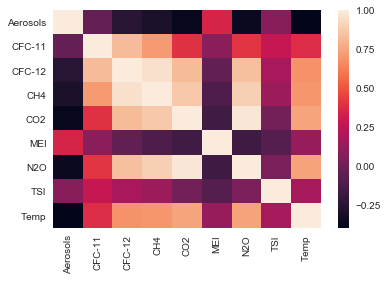

In [232]:
sns.heatmap(gw2.corr())

In [233]:
gw3 = gw2[gw2.columns.difference(['Temp'])]

In [234]:
# Create features
X, y = gw3, gw2.Temp

In [235]:
# Make test and training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [236]:
# Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean')

In [237]:
# "Train" dummy regressor
model=dummy_mean.fit(X_train, y_train)

In [238]:
# Create a dummy regressor
#dummy_constant = DummyRegressor(strategy='constant', constant=20)

# "Train" dummy regressor
#dummy_constant.fit(X_train, y_train)

In [239]:
# Get R-squared score
#dummy_constant.score(X_test, y_test)  

In [240]:
model.score(X,y)

-1.0771487450433881e-05

In [442]:
Y_base=model.predict(X_train)

In [444]:
Y_base

array([ 0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25736279,
        0.25736279,  0.25736279,  0.25736279,  0.25736279,  0.25

In [243]:
df=(y_train-Y)**2

In [244]:
df.sum()

6.5434317023255817

In [245]:
gw3.head()

,Aerosols,CFC-11,CFC-12,CH4,CO2,MEI,N2O,TSI
0,0.0863,191.324,350.113,1638.59,345.96,2.556,303.677,1366.1024
1,0.0794,192.057,351.848,1633.71,345.52,2.167,303.746,1366.1208
2,0.0731,192.818,353.725,1633.22,344.15,1.741,303.795,1366.2850
3,0.0673,193.602,355.633,1631.35,342.25,1.130,303.839,1366.4202
4,0.0619,194.392,357.465,1648.40,340.17,0.428,303.901,1366.2335


5)	Build a linear regression model to predict the dependent variable Temp, using CO2, N2O, CFC.12, and Aerosols as independent variables. Find the RMSE, SSE and MAPE for the above Model. What is the model R2 (the "Multiple R-squared" value & Adjusted R2).

In [316]:
gw4 = gw3[['CO2', 'N2O','CFC-12','Aerosols']]

In [317]:
gw4.head()

,CO2,N2O,CFC-12,Aerosols
0,345.96,303.677,350.113,0.0863
1,345.52,303.746,351.848,0.0794
2,344.15,303.795,353.725,0.0731
3,342.25,303.839,355.633,0.0673
4,340.17,303.901,357.465,0.0619


In [318]:
X,y=gw4,gw2.Temp

In [428]:
np.random.seed(40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [429]:
regR = linear_model.LinearRegression()

In [430]:
model1=regR.fit(X_train,y_train)

In [431]:
#X_train=sm.add_constant(X_train) #for getting intercept value321

In [432]:
#linRegModel=sm.OLS(y_train,X_train).fit()

In [433]:
#linRegModel.summary()

In [434]:
y_pred=model1.predict(X_train)

In [435]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('RSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.596931221879
MAE: 0.0865178766525
RSE: 0.0125873537873
RMSE: 0.112193376753


In [436]:
y_pred_test=model1.predict(X_test)

In [438]:
print('R^2:',metrics.r2_score(y_test, y_pred_test))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.590232270295
MAE: 0.0924943831888
MSE: 0.0136835096292
RMSE: 0.116976534524


##### SSE for train

In [439]:
se=(y_train-y_pred)**2

In [441]:
sse=se.sum()
sse

2.7062810642731749

##### SST for train

In [445]:
st=(y_train-Y_base)**2

In [446]:
sst=st.sum()
sst

6.7207782604651154

##### SSR for train

In [447]:
ssr=sst-sse
ssr

4.0144971961919405

##### MAPE of model

In [448]:
def mean_absolute_percentage_error(y_train, y_pred): 
    y_train, y_pred = np.array(y_train), np.array(y_pred)
    return np.mean(np.abs((y_train - y_pred) / y_train)) * 100

In [454]:
mean_absolute_percentage_error(y_train, y_pred)

157.94806425140246

##### Adjusted R2

In [463]:
1-(1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-4-1)

0.58925372134347409

##### MSR

In [464]:
msr=ssr/4
msr

1.0036242990479851

##### MSE

In [467]:
mse=sse/(len(y_train)-4-1)
mse


0.012887052687015118

##### F-Stat

In [469]:
fstat=msr/mse
fstat

77.878497389804906

#### Residual Analysis

##### Independence of errors

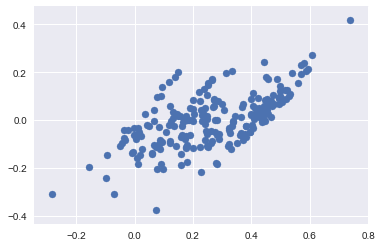

In [471]:
plt.scatter(y_train,y_train-y_pred)

##### Normality

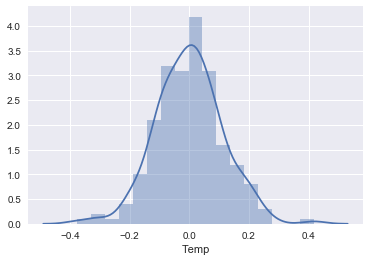

In [475]:
sns.distplot(y_train-y_pred)

##### Linearity

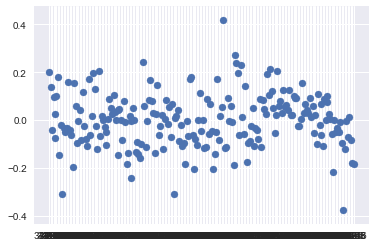

In [476]:
plt.scatter(X_train[["CO2"]],y_train-y_pred)

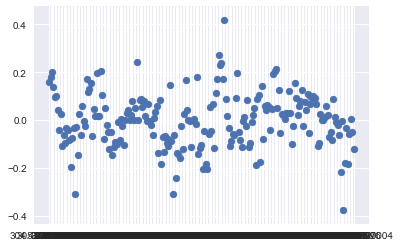

In [477]:
plt.scatter(X_train[["N2O"]],y_train-y_pred)

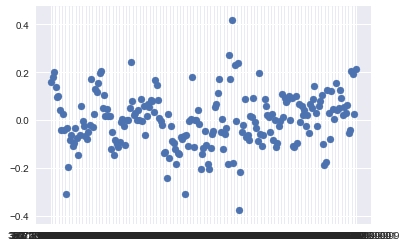

In [478]:
plt.scatter(X_train[["CFC-12"]],y_train-y_pred)

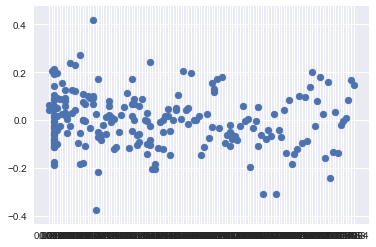

In [479]:
plt.scatter(X_train[["Aerosols"]],y_train-y_pred)